In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/socathie/paperplane/master/data/most_backed.csv')
df.head()

,Unnamed: 0,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,0,8782571.0,\nThis is a card game for people who are into ...,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,2,5408916.0,\nBring Reading Rainbow’s library of interacti...,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [27]:
df['category'].nunique()

115

In [28]:
df['category'].unique()

array(['Tabletop Games', 'Product Design', 'Web', 'Narrative Film',
       'Video Games', 'Technology', 'Gaming Hardware', 'Television',
       'Hardware', 'Music', 'Space Exploration', 'Radio &amp; Podcasts',
       'Flight', 'Sound', 'Animation', 'Games', 'Action', 'Gadgets',
       'Documentary', '3D Printing', 'DIY Electronics', 'Publishing',
       'Fashion', 'Comics', 'Typography', "Children's Books", 'Apparel',
       'Food', 'Crafts', 'Camera Equipment', 'Comedy', 'Design',
       'Graphic Design', 'Apps', 'Hip-Hop', 'World Music',
       'Film &amp; Video', 'Drinks', 'Wearables', 'Accessories',
       'Footwear', 'Science Fiction', 'Art Books', 'Nonfiction', 'Robots',
       'Art', 'Software', 'Chiptune', 'Webseries', 'Webcomics', 'Rock',
       'Playing Cards', 'Cookbooks', 'Fantasy', 'Photography',
       'Anthologies', 'Faith', 'Mixed Media', 'Metal', 'Small Batch',
       'Classical Music', 'Architecture', 'Pop', 'Dance',
       'Electronic Music', 'Graphic Novels', 'Music

In [29]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


In [30]:
import string

def normalize_string(s):
    for p in string.punctuation:
        s = s.replace(p, ' ')
    s = s.lower().strip()
    return s

In [31]:
# Normalizing blurb by removing punctuations, changing to lower case and stripping empty spaces

df['norm_blurb'] = df['blurb'].apply(normalize_string)
df.head()

,Unnamed: 0,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,norm_blurb
0,0,8782571.0,\nThis is a card game for people who are into ...,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,this is a card game for people who are into ki...
1,1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,an unusually addicting high quality desk toy ...
2,2,5408916.0,\nBring Reading Rainbow’s library of interacti...,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,bring reading rainbow’s library of interactive...
3,3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...,updated this is it we re making a veronica m...
4,4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure,an adventure game from tim schafer double fin...


In [62]:
cat_count = df['category'].value_counts()
cat_count.head(10)


Product Design    769
Tabletop Games    745
Video Games       528
Hardware          182
Technology        151
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

In [83]:
# Copying a new df

df1 = df.copy()

In [84]:
# Add a column of category count, number of entries in same category

df1['category_count'] = df1['category'].apply(lambda x : cat_count.loc[x])

In [85]:
df1.head(2)

,Unnamed: 0,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,norm_blurb,category_count
0,0,8782571.0,\nThis is a card game for people who are into ...,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,this is a card game for people who are into ki...,745
1,1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,an unusually addicting high quality desk toy ...,769


In [86]:
# initializing a new column "new_category"

df1['new_category'] = df1['category']

In [87]:
import numpy as np

df1['fuzzratio'] = np.nan

In [88]:
df1.head(1)

,Unnamed: 0,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url,norm_blurb,category_count,new_category,fuzzratio
0,0,8782571.0,\nThis is a card game for people who are into ...,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,this is a card game for people who are into ki...,745,Tabletop Games,NaN


In [115]:
# Brute force method to compare similarities based on normalized blurb
# Use fuzz ratio metric to return "how similar" the current blurb is with all other blurbs

# k is the threshold cut off, i.e. top k categories
k = 10

top_k_list = list(df1['new_category'].value_counts().head(k).index)
top_10_df = df[df['category'].isin(top_k_list)]
top_10_df.reset_index(inplace = True, drop = True)

for i in range(len(df1['category_count'])):
    
    # Only change the category if current entry not within top threshold categories
    
    if df1.loc[i, 'category'] not in top_k_list:
        
        # Initializing empty list to contain the fuzz_ratios compared to other blurb
        fuzz_list = []
        
        # Get current blurb as basis for comparison
        ownblurb = df1.loc[i,'norm_blurb']
        
        # Loop through all other blurbs to compare
        for j in top_10_df['norm_blurb']:
            
            fuzz_ratio = fuzz.ratio(ownblurb, j)
            fuzz_list.append(fuzz_ratio)
        
        # Update the new_category with the category of the entry with the highest fuzz ratio
        df1.loc[i, 'new_category'] = top_10_df.loc[fuzz_list.index(max(fuzz_list)),'category']
        df1.loc[i, 'fuzzratio'] = max(fuzz_list)


In [117]:
df1['new_category'].value_counts()

Product Design       1080
Tabletop Games       1050
Video Games           720
Hardware              269
Technology            216
Documentary           187
Gadgets               161
Design                157
Comics                155
Space Exploration       5
Name: new_category, dtype: int64

In [118]:
df1['new_category'].nunique()

10

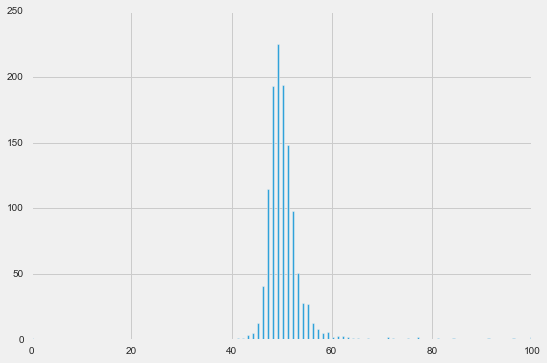

In [122]:
df1['fuzzratio'].hist(bins = 200)

In [123]:
df1.to_csv('df_10_category.csv')

In [125]:
df['currency'].unique()

array(['usd', 'gbp', 'cad', 'aud', 'eur', 'sek', 'nzd', 'dkk', 'chf'], dtype=object)

In [129]:
a = df['currency'].unique()

In [132]:
ks = pd.read_csv('all_data.csv', sep = '|')
ks.head()

,Unnamed: 0,amt_pledged,blurb,category,new_category,currency,goal,location,num_backers,num_backers_tier,...,avg_tier_amount,median_tier_amount,avg_num_backers_tier,median_num_backers_tier,num_backers_bin,tier_backer_ratio,num_tiers,num_tiers_with_backers,project_updated,unique_words_ratio
0,0,8782571.0,this is a card game for people who are into ki...,Tabletop Games,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]",...,163.75,67.5,54661.00,7852.5,1,"[7.091436307422111, 92.81480397358263, 0.09147...",4,4,0,0.894737
1,1,6465690.0,an unusually addicting highquality desk toy de...,Product Design,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...",...,186.42,57.0,12894.17,5449.0,1,"[0.50927421960835, 0.1615717701803141, 27.8375...",12,12,0,0.904762
2,2,5408916.0,bring reading rainbow’s library of interactive...,Web,Documentary,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...",...,1277.34,475.0,1448.44,17.0,1,"[21.18554476806904, 15.472491909385115, 9.8554...",64,64,0,0.909091
3,3,5702153.0,updated this is it were making a veronica mars...,Narrative Film,Documentary,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...",...,1498.31,425.0,2758.59,100.0,1,"[6.726706315491363, 9.541772868875672, 13.0376...",32,32,1,0.880000
4,4,3336371.0,an adventure game from tim schafer double fine...,Video Games,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]",...,1883.89,250.0,9596.00,900.0,1,"[55.516187300263994, 28.52577462831735, 1.2620...",9,9,0,1.000000


In [139]:
ks_cat.head()

,new_category
Tabletop Games,787
Product Design,774
Documentary,659
Video Games,568
Comics,268


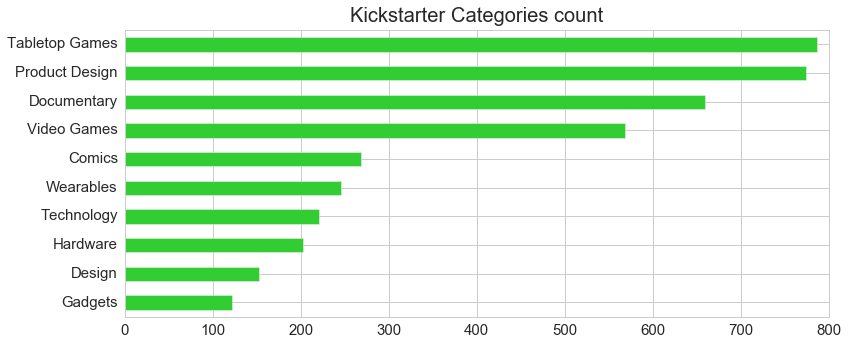

In [239]:
import matplotlib.pyplot as plt

ks_cat = pd.DataFrame(ks.new_category.value_counts())

ax = ks_cat.sort_values('new_category', ascending = True).plot(kind = 'barh', legend=False, \
                                                          color = 'limegreen', \
                                                         figsize = (12,5))


ax.tick_params(axis = 'both', labelsize = 15)
ax.set_title('Kickstarter Categories count', y = 1.01)
plt.tight_layout()
plt.savefig('catcount.png')

In [177]:
ks.head(1)

,Unnamed: 0,amt_pledged,blurb,category,new_category,currency,goal,location,num_backers,num_backers_tier,...,avg_tier_amount,median_tier_amount,avg_num_backers_tier,median_num_backers_tier,num_backers_bin,tier_backer_ratio,num_tiers,num_tiers_with_backers,project_updated,unique_words_ratio
0,0,8782571.0,this is a card game for people who are into ki...,Tabletop Games,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]",...,163.75,67.5,54661.0,7852.5,1,"[7.091436307422111, 92.81480397358263, 0.09147...",4,4,0,0.894737


In [ ]:
pd.pivot_table(df, index = ["County"],\
               values = ["State Bottle Retail", "Sale (Dollars)", 'Bottles Sold'],\
               aggfunc = [np.sum]).sort_values([('sum', 'Bottles Sold')], ascending = False)

In [200]:
cat_performance = pd.pivot_table(ks, index = ['new_category'], values = ['amt_pledged', 'goal'])
col = list(cat_performance.index)
col

['Comics',
 'Design',
 'Documentary',
 'Gadgets',
 'Hardware',
 'Product Design',
 'Tabletop Games',
 'Technology',
 'Video Games',
 'Wearables']

In [225]:
cat_performance1 = pd.pivot_table(ks, index = ['new_category'], values = ['amt_pledged', 'goal'])

cat_performance1.reset_index(inplace = True, drop = True)
cat_performance1 = cat_performance1.applymap(lambda x: round(x, 2))

In [226]:
cat_performance = cat_performance1
cat_performance.index = col
cat_performance.sort_values('amt_pledged', ascending = False)
cat_performance['amt_pledged'] = cat_performance['amt_pledged'] - cat_performance['goal']
cat_performance

,amt_pledged,goal
Comics,128828.61,55342.86
Design,174152.19,41998.95
Documentary,134619.28,84554.75
Gadgets,229261.88,53164.46
Hardware,314750.04,70731.13
Product Design,321704.64,39314.42
Tabletop Games,243823.27,26669.62
Technology,362232.37,66255.58
Video Games,140013.57,120693.45
Wearables,286490.57,58723.02


In [222]:
cat_performance.sort_values('amt_pledged', ascending = True, inplace = True)
cat_performance

,amt_pledged,goal
Comics,128828.61,55342.86
Documentary,134619.28,84554.75
Video Games,140013.57,120693.45
Design,174152.19,41998.95
Gadgets,229261.88,53164.46
Tabletop Games,243823.27,26669.62
Wearables,286490.57,58723.02
Hardware,314750.04,70731.13
Product Design,321704.64,39314.42
Technology,362232.37,66255.58


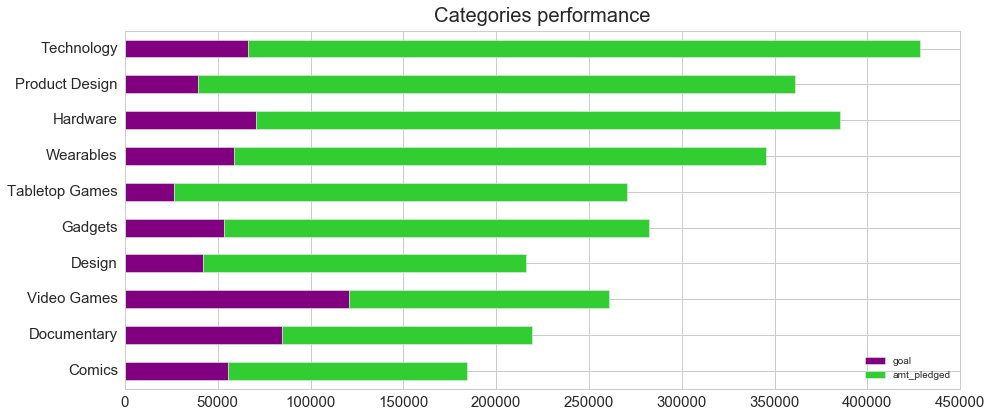

In [223]:
ax = cat_performance[['goal', 'amt_pledged']].plot.barh(stacked = True, color=['purple','limegreen'])
ax.tick_params(axis = 'both', labelsize = 15)
ax.set_title('Categories performance', y = 1.01)
plt.tight_layout()
plt.savefig('catperform.png')

In [237]:
cat_performance1['pledged_goal_ratio'] = cat_performance1['amt_pledged'] / cat_performance1['goal']
cp = cat_performance1['pledged_goal_ratio'].sort_values(ascending = True)

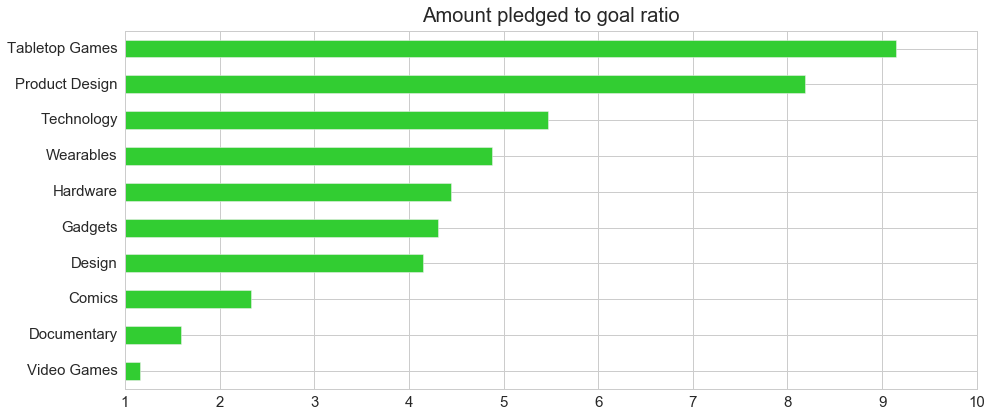

In [240]:
ax = cp.plot.barh(color='limegreen')
ax.tick_params(axis = 'both', labelsize = 15)
ax.set_title('Amount pledged to goal ratio', y = 1.01)
ax.set_xlim(1,10)
plt.tight_layout()
plt.savefig('catpledgeratio.png')